# Part 2 - Classification

## Pre-processing

In [1]:
# All imports
import pandas as pd
from sklearn import preprocessing
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mutual_info_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data into dataframe
yeast = pd.read_csv("all_yeast.csv")

In [2]:
def print_df_meta(col):

    print(col_name)
    print("Min:", col.min())
    print("Median:", col.median())
    print("Max:", col.max())
    print("Mean:", col.mean())
    print("Std:", col.std())
    print("")

### Impute missing values

In [3]:
# Interating through all columns
for col_name in yeast:
    
    col = yeast[col_name]
    
    # If the column contains any null values then replace with the median
    if col.isnull().values.any() == True:
        yeast[col_name] = col.fillna(col.median())
        print_df_meta(col)

mcg
Min: 0.11
Median: 0.48
Max: 1.0
Mean: 0.4976280323450134
Std: 0.13147241947588034

gvh
Min: 0.13
Median: 0.49
Max: 1.0
Mean: 0.49964285714285717
Std: 0.12195449975147692

alm
Min: 0.21
Median: 0.51
Max: 7.501819407
Mean: 0.5061669942095687
Std: 0.19983967915330103

mit
Min: 0.0
Median: 0.22
Max: 3.000727763
Mean: 0.2604317572526954
Std: 0.15081686328857657

erl
Min: 0.5
Median: 0.5
Max: 3.500849057
Mean: 0.5067391166152291
Std: 0.09157974528810373

vac
Min: 0.0
Median: 0.51
Max: 6.001455526
Mean: 0.5041990940202157
Std: 0.15348798428400867

nuc
Min: 0.0
Median: 0.22
Max: 4.501091644
Mean: 0.2767123259056604
Std: 0.15231496275897186



#### Choice of imputation method: 
The median imputation method is more suitable as it is not unaffected by skewed data as much as the mean imputation method.

### Scale the features

#### 1) Mean centering

In [4]:
# Extract all numerical data features
yeast_num = yeast[['mcg','gvh','alm','mit','erl','pox','vac','nuc']]

# Scaling by mean centering
yeast_num_centered = yeast_num.subtract(yeast_num.mean())

# Re-print the meta data showing the mean centered data 
for col_name in yeast_num_centered:
    col = yeast_num_centered[col_name]
    print_df_meta(col)

mcg
Min: -0.38762803234501414
Median: -0.017628032345014144
Max: 0.5023719676549858
Mean: -6.511712403192293e-16
Std: 0.13147241947588034

gvh
Min: -0.3696428571428564
Median: -0.009642857142856398
Max: 0.5003571428571436
Mean: 7.529167466191088e-16
Std: 0.12195449975147692

alm
Min: -0.29616699420956816
Median: 0.003833005790431887
Max: 6.995652412790432
Mean: 6.149618101360368e-16
Std: 0.19983967915330103

mit
Min: -0.2604317572526965
Median: -0.040431757252696515
Max: 2.7402960057473034
Mean: -1.0940634442128228e-15
Std: 0.15081686328857657

erl
Min: -0.006739116615229079
Median: -0.006739116615229079
Max: 2.994109940384771
Mean: 3.112215486819846e-17
Std: 0.09157974528810373

pox
Min: -0.007500000000000001
Median: -0.007500000000000001
Max: 0.8225
Mean: 5.985029782345858e-19
Std: 0.07568266520506624

vac
Min: -0.5041990940202138
Median: 0.0058009059797862195
Max: 5.497256431979786
Mean: 1.851020085935015e-15
Std: 0.15348798428400867

nuc
Min: -0.276712325905665
Median: -0.056712325

#### 2) Standardisation

In [5]:
# Scale by Z score Standardisation
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(yeast_num)
scaled_df = pd.DataFrame(scaled_df, columns=yeast_num.columns)

# Print meta data
for col_name in scaled_df:
    col = scaled_df[col_name]
    print_df_meta(col)

mcg
Min: -2.9493539585714115
Median: -0.13412679847755354
Max: 3.822408669762463
Mean: 5.338646565852505e-16
Std: 1.000337097599327

gvh
Min: -3.032011640539163
Median: -0.07909595584015233
Max: 4.104201264150112
Mean: -1.8194490538331406e-16
Std: 1.000337097599327

alm
Min: -1.4825225533165736
Median: 0.01918686971339724
Max: 35.01812382843247
Mean: 2.9925148911729286e-16
Std: 1.0003370975993273

mit
Min: -1.7273900444035197
Median: -0.26817549323786627
Max: 18.17581730039812
Mean: 8.618442886578034e-17
Std: 1.0003370975993273

erl
Min: -0.07361221997346361
Median: -0.07361221997346361
Max: 32.70504016183221
Mean: 3.806478941571965e-16
Std: 1.0003370975993273

pox
Min: -0.09913139569895499
Median: -0.09913139569895499
Max: 10.87140972831873
Mean: 4.788023825876686e-18
Std: 1.000337097599327

vac
Min: -3.2860491371827933
Median: 0.037806617099919906
Max: 35.82762240039934
Mean: -2.44189215119711e-16
Std: 1.000337097599327

nuc
Min: -1.817323787187301
Median: -0.3724613949080574
Max: 27

#### Comparision:
Prepare the test and training data

In [6]:
# Replace traget values with boolean values
target_values = yeast['Class']
target_values = target_values.replace('CYT', 1)
target_values = target_values.replace('non-CYT', 0)\
# Create random seed to be used throughout the program
rand = 792

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(yeast_num_centered, 
    target_values, test_size=1/3, random_state=rand)

**K nearest neighbours for k = 5 neighbours**

In [7]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Print accuracy of k-nn for k = 5
print("Accuracy of " + str(knn.score(X_test, y_test)*100) + "%")

Accuracy of 66.66666666666666%


**K nearest neighbours for k = 10 neighbours**

In [8]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 10)
# Fit the classifier to the data
knn.fit(X_train,y_train)

# Print accuracy of k-nn for k = 10
print("Accuracy of " + str(knn.score(X_test, y_test)*100) + "%")

Accuracy of 68.28282828282828%


**Decision tree classifier**

In [9]:
# Create the classifier with rand state
classifier = DecisionTreeClassifier(criterion="entropy",
                                   random_state=rand)
# Fit the training data to the classifier
classifier.fit(X_train, y_train)
# Print accuracy of decision tree classifier
print("Accuracy of " + str(classifier.score(X_test, y_test)*100) + "%")

Accuracy of 64.84848484848484%


### Feature Engineering
**K-Means feature**

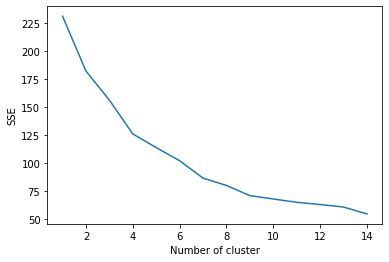

In [10]:
# Performing kmeans for 1 to 15 clusters
yeast_k_mean = yeast_num_centered.copy()

# Sum of square errors
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000, 
                    random_state = rand).fit(yeast_k_mean)
    # Which cluster each row belongs to.
    yeast_k_mean["cluster label"] = kmeans.labels_
    # Sum of square errors
    sse[k] = kmeans.inertia_


# Plot results
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")

# Using the elbow method k = 6 seemed like a good number of clusters
k = 6
kmeans = KMeans(n_clusters=k, max_iter=1000,
               random_state = rand).fit(yeast_k_mean)
# Which cluster each row belongs to.
yeast_k_mean["cluster label"] = kmeans.labels_


Here we can see 6 is an appropriate number of clusters for this dataset.
**Interaction pair generation**

In [11]:
# Copy the data set for interaction ar calculatons
yeast_num_centered_inter = yeast_num_centered.copy()
# Mutual info list
mi_list = []
# List of most accurate combinations of the num of k-nn and top n features
top_accuracy = []
# Blank data frame
top_n_feat = pd.DataFrame()

# Number of features before interaction pair
num_feat = len(yeast_num_centered_inter.iloc[0,:])
feature_index = 0


# Generates all possible feature combinations
for i in range(num_feat):
    for j in range(i,num_feat):
        # Multiplying the columns
        yeast_num_centered_inter["feature " + str(feature_index)] \
            = yeast_num_centered.iloc[:, i]*yeast_num_centered.iloc[:, j]
        feature_index = feature_index + 1


# Calcualte mutual info
index=0
for col in yeast_num_centered_inter.iloc[0,:]:
    mi_list.append(
        (mutual_info_score(yeast_num_centered_inter.iloc[:,index], 
                           yeast["Class"]),index))
    index = index + 1
    
    
# Sort the list to find the highest levels of shared infomation with the class
mi_list.sort(reverse = True)

**Feature Selection for interaction pairs**

In [12]:
tot_num_feat = len(yeast_num_centered_inter.iloc[0,:])

# This block calcuates severel different knn accuracies
# based on different number of k-nn and top n mutual infomation features
# for interaction pairs features

max_iter = 15
for knn_num in range(1, max_iter):
    # Top n (1,15) features with highes MI
    for top_n in range(1, max_iter):

        i = 0
        
        # Creates a temp df to do the testing on, this gets overwritten each loop
        for (mi, index) in mi_list:
            i = i + 1
            
            top_n_feat[str(i)] = yeast_num_centered_inter.iloc[:,index]
         
            if i >= top_n:
                break
        # Train the data
        X_train, X_test, y_train, y_test = train_test_split(top_n_feat, 
            target_values, test_size=1/3, random_state=rand)

        # Create KNN classifier
        knn = KNeighborsClassifier(n_neighbors = knn_num)
        # Fit the classifier to the data
        knn.fit(X_train,y_train)
        # Evaluate the score and place on a list including other useful meta data
        score = knn.score(X_test, y_test)*100
        top_accuracy.append((score, top_n, knn_num))

# Sort the accuracy by best results
top_accuracy.sort(reverse = True)
# Prints the best result
(score,  top_n, knn_num) = top_accuracy[0]
print("Prediction accuracy of " + str(score) + "%")
print("With a top number of features to select of", top_n, 
      "and number of nearest neighbours of",knn_num)

Prediction accuracy of 70.70707070707071%
With a top number of features to select of 14 and number of nearest neighbours of 2


**Feature Selection for cluster feature**

In [13]:
# make a df for k means cluster deature
yeast_num_centered_clust = yeast_num_centered.copy()
yeast_num_centered_clust["F cluster labels"] = yeast_k_mean["cluster label"]

**Mutual info using cluster label feature**

In [14]:
mi_list = []
# Calcualte mutual info
index = 0
for col in yeast_num_centered_clust.iloc[0,:]:
    mi_list.append(
        (mutual_info_score(yeast_num_centered_clust.iloc[:,index], 
                           yeast["Class"]),index))
    index = index + 1
# Sort it    
mi_list.sort(reverse = True)

**Accuracy of cluster label feature selection**

In [15]:
tot_num_feat = len(yeast_num_centered_clust.iloc[0,:])

# This block calcuates severel different knn accuracies
# based on different number of k-nn and top n mutual infomation features
# for cluster label feature

# Itterates through different knn numbers
# 15 is used to keep computations quicker
max_iter = 15
for knn_num in range(1, max_iter):
    
    for top_n in range(1, max_iter):

        i = 0
        for (mi, index) in mi_list:
            i = i + 1
            top_n_feat[str(i)] = yeast_num_centered_clust.iloc[:,index]
   
            if i >= top_n:
                break

        X_train, X_test, y_train, y_test = train_test_split(top_n_feat, 
            target_values, test_size=1/3, random_state=rand)

        # Create KNN classifier
        knn = KNeighborsClassifier(n_neighbors = knn_num)
        # Fit the classifier to the data
        knn.fit(X_train,y_train)

        score = knn.score(X_test, y_test)*100

        top_accuracy.append((score, top_n, knn_num))

        
# Sorts and prints the top accuracy
top_accuracy.sort(reverse = True)

(score, top_n, knn_num) = top_accuracy[0]
print("Accuracy of " + str(score) + "%")
print("With a top number of features to select of", top_n, 
      "and number of nearest neighbours of",knn_num)


Accuracy of 70.70707070707071%
With a top number of features to select of 14 and number of nearest neighbours of 2


**Which parameter values we selected**
To determine our values we decided to brute force this problem and try all possible combinations of the number of features selected and the number of nearest neighbours to use in our knn analysis.

This was achieveable due to the computaton complexity of the task being low considering the relativly small number of data points we dealt with.

We found that multiple combinations of parameters could sometimes (depending on the random state) produce the same accuracy. With the random state seed of the program set to 792 (arbitiary value used for our analysis) we could achieve an accuracy of 70.7070% for both sets of anaysis (interaction pairs and clustering labels) using the top 14 mutal infomation features with the 2 nearest neighbours.

**Did feature selection and generation with interaction term pairs deliver an accuracy boost**
Yes. In this random state and in general, interaction pair feature generation provided a signifiganct boost in accuracy. Before the feature generaton we achieved an accuracy of 68.2828% using k = 10 nearest neighbours and 66.66% accuracy for k = 5 nearest neighbours.

After the feature selection and interaction term pairs an accuracy of 70.7070% was achieved, thus a 2.424% improvement was made.

**Did feature selection and clustering labels deliver an accuracy boost**
Yes. As mentioned above both clustering labels and interaction term pairs delivered an accuracy boost of 2.424% in this particular random state and in general provided improvements in most random states. The same parameters produced the greatest accuracy in this analysis and since the best accuracy achieved was the same it can be suggested that the feature selcton played the biggest role in this performance improvement.